In [32]:
from keras.models import load_model

In [47]:
### Settings ###
model = load_model('multi_calassification.h5')
img_path = r'kitori_001.png'
img_path = r'cat.99999.jpg'

In [48]:
from keras.preprocessing import image
import numpy as np

In [49]:
img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor  /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


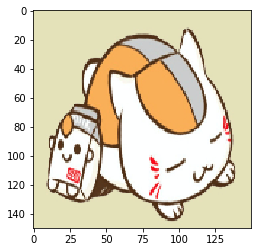

In [51]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [52]:
# List 5-27
from keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [53]:
# List 5-28
activations = activation_model.predict(img_tensor)

In [54]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


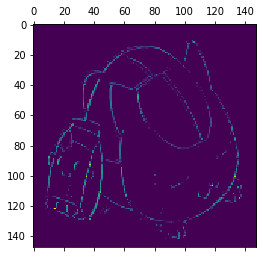

In [55]:
# List 5-29
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0,:,:,4], cmap='viridis')
plt.show()


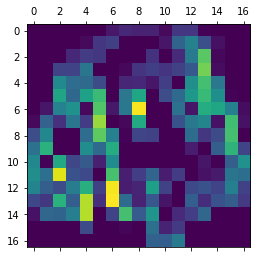

In [56]:
# List 5-30
# plt.matshow(first_layer_activation[0,:,:,27],cmap='viridis')
plt.matshow(activations[5][0,:,:,80],cmap='viridis')
plt.show()

In [57]:
import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')  

C:\Users\yueki\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


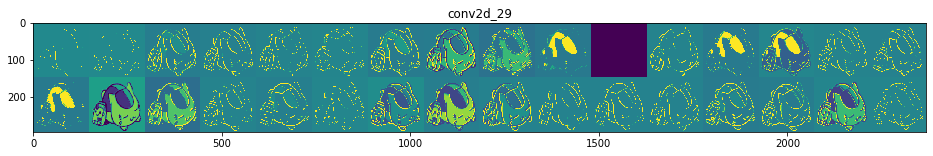

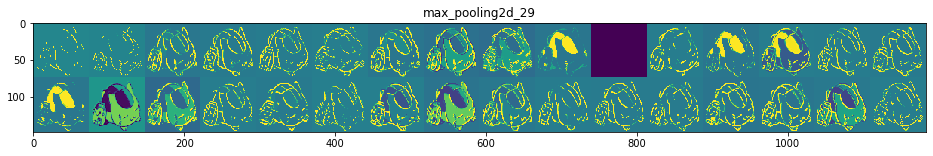

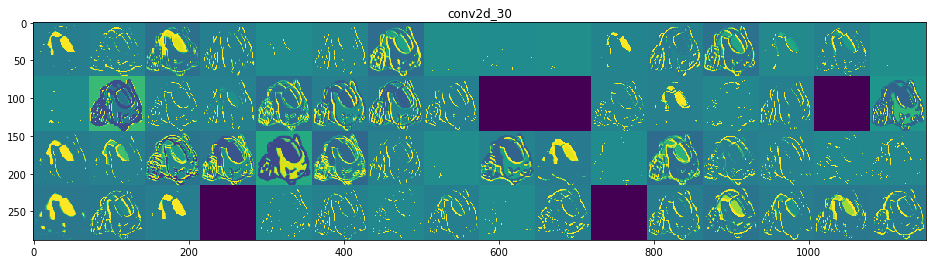

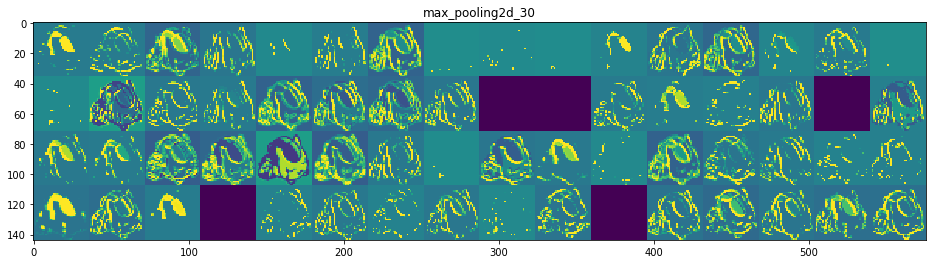

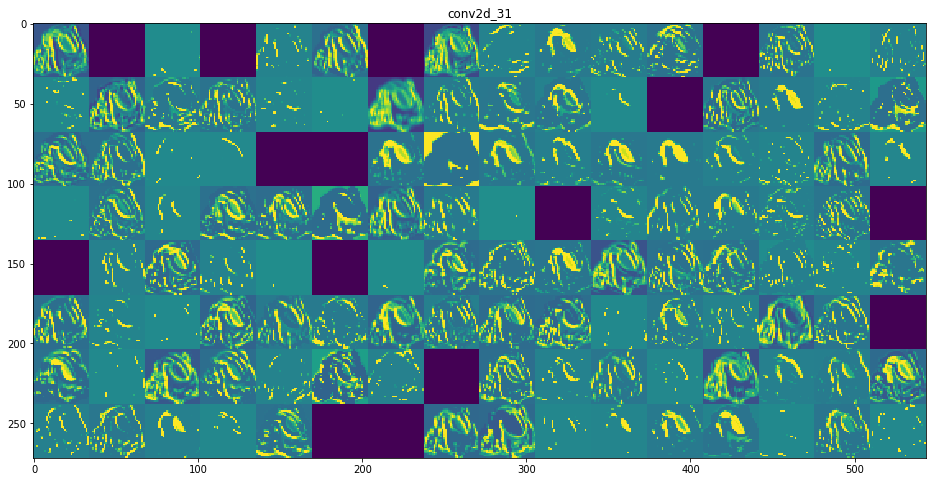

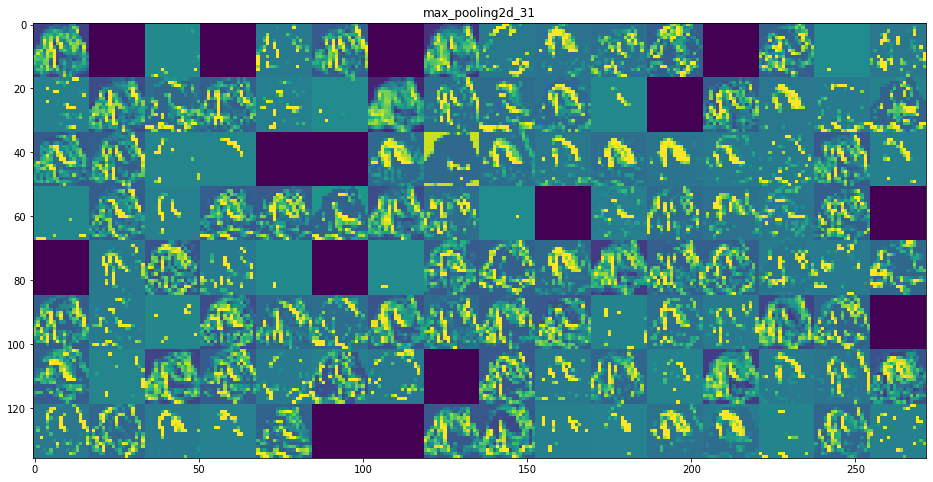

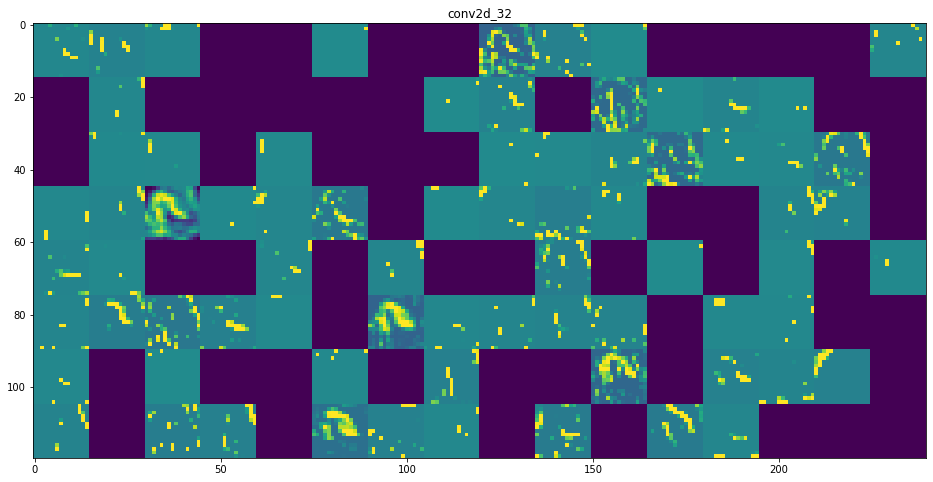

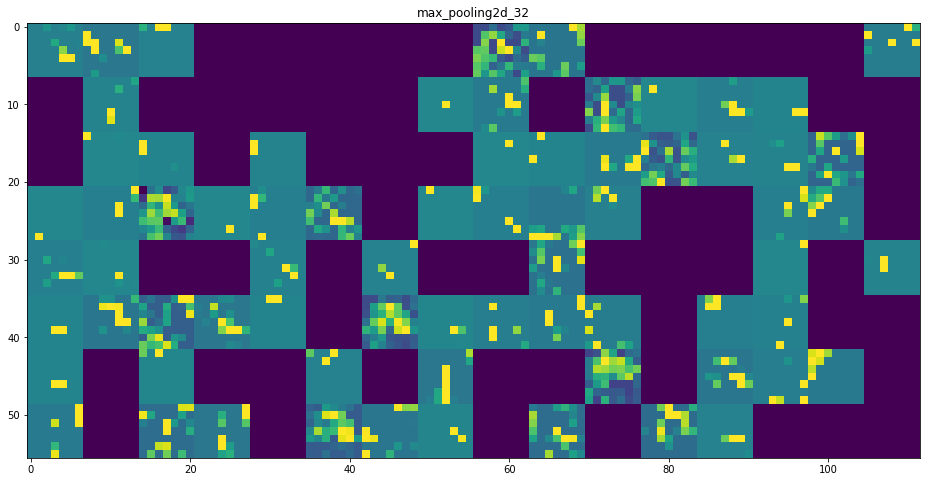

In [58]:
plt.show()  